In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Introduction**


This notebook provides an introduction to the Leaky Integrate-and-Fire (LIF) model, designed for individuals with a foundational understanding of neuroscience. It is divided into two main chapters:

1. **Leaky Integrate-and-Fire (LIF) Model**
2. **Adaptive Threshold**

While primarily based on Neuronal Dynamics by Wulfram Gerstner, Werner M. Kistler, Richard Naud, and Liam Paninski, the notebook also incorporates alternative mathematical approaches in some implementations.

**Important** Please note that this notebook is not officially related to the book and authors.

**Chapter 1: Leaky Integrate-and-Fire (LIF) Model**

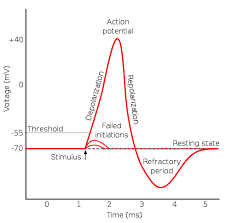

**Figure 1: Action Potential**

Source: The Action Potential - TeachMePhysiology

Available: https://teachmephysiology.com/nervous-system/synapses/action-potential/

**Basic Background**
The Leaky Integrate-and-Fire (LIF) model is a simplified mathematical representation of a neuron's membrane potential, which evolves over time in response to incoming signals (postsynaptic). When the membrane potential reaches a threshold, the neuron "fires," producing an output called a "spike." Following this, the membrane potential is reset to a lower value, known as the reset potential, to start the process over again. The basic LIF model does not adapt due to its fixed threshold, but an adaptive version will be implemented in chapter 2. The linear differential equation of this model is defined as:

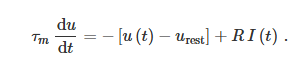

**Equation 1: Equation of LIF**

where u is the membrane potential, tau as the membrane time constant and I as the postsynaptic signal. Our input current (I) will be fixed to simplify the model. The tau is defined as:

In [ ]:
R = 2 # membrane resistance (MΩ)
C = 4.0# membranne capacitance (µF)
tau = R * C
I = 10 #Input current (nA)

where R as the resistor and C as the capacitor and are of arbitary values

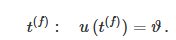

Lastly, the threshold is defined as nu where after the model has fired, the potential is reset to a value less than the threshold.

In [ ]:
U_rest = 0 #Resting Potential (mV)
nu = 15 #Threshold potential (mV)


dt = 0.1 #Time steps (ms)
t_total = 100.0 #Total steps

The reader must be reminded the membrane potential values used in this notebook are simplified for ease of understanding and implementation. In a more biologically accurate model, the resting potential is typically around -70 mV, and the threshold potential is about -55 mV. However, for the sake of clarity and simplicity in this model, we use 0 mV as the resting potential and 15 mV as the threshold potential.

We need to implement a mechanism to "reset" the membrane potential after it has reached the threshold. For demonstration purposes, we set the reset potential to an arbitrary value of -10 mV to illustrate the "rebound" or "leaky" effect. In this context, the neuron's potential returns to this reset value after firing and then gradually stabilizes back to the resting potential due to the leaky nature of the model.

In [ ]:
U_reset = -10 #Reset potential (mV)

**Simulation**

In [ ]:
U = U_rest # We let U0 be at the rest

trace = [U]

time = np.arange(0, t_total, dt)

Here we use Euler's Method to solve ODEs by approximating the solution to simulate our model.

In [ ]:
for t in time[1:]:
    dU = (-(U - U_rest) + R * I) * (dt / tau)  # Recall equation 1. We move dt and tau to right side to solve for the change in membrane potential dU.
    U += dU  # Integrate the approximated potential to our potential
    if U >= nu:  # Check if potential is more or equal to the threshold to fire.
        trace.append(nu)
        U = U_reset
    else:
        trace.append(U)

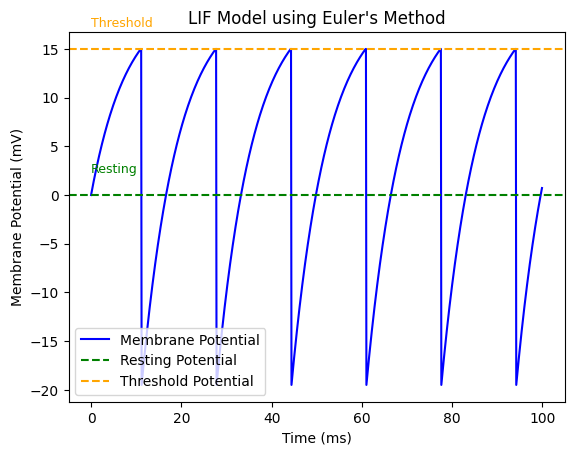

In [ ]:
plt.plot(time, trace, label='Membrane Potential', color='blue')

plt.axhline(y=U_rest, color='green', linestyle='--', label='Resting Potential')
plt.axhline(y=nu, color='orange', linestyle='--', label='Threshold Potential')

plt.text(time[0], U_rest + 2, 'Resting', color='green', fontsize=9, verticalalignment='bottom')
plt.text(time[0], nu + 2, 'Threshold', color='orange', fontsize=9, verticalalignment='bottom')

plt.title('LIF Model using Euler\'s Method')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()